In [39]:
# おまじない
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
#ステップ応答データの読み込み。1列目：時間、2列目：電圧。
filename11 = 'StepButter.txt'
df11 = pd.read_table(filename11, names=('Time', 'Voltage'), skiprows=1)

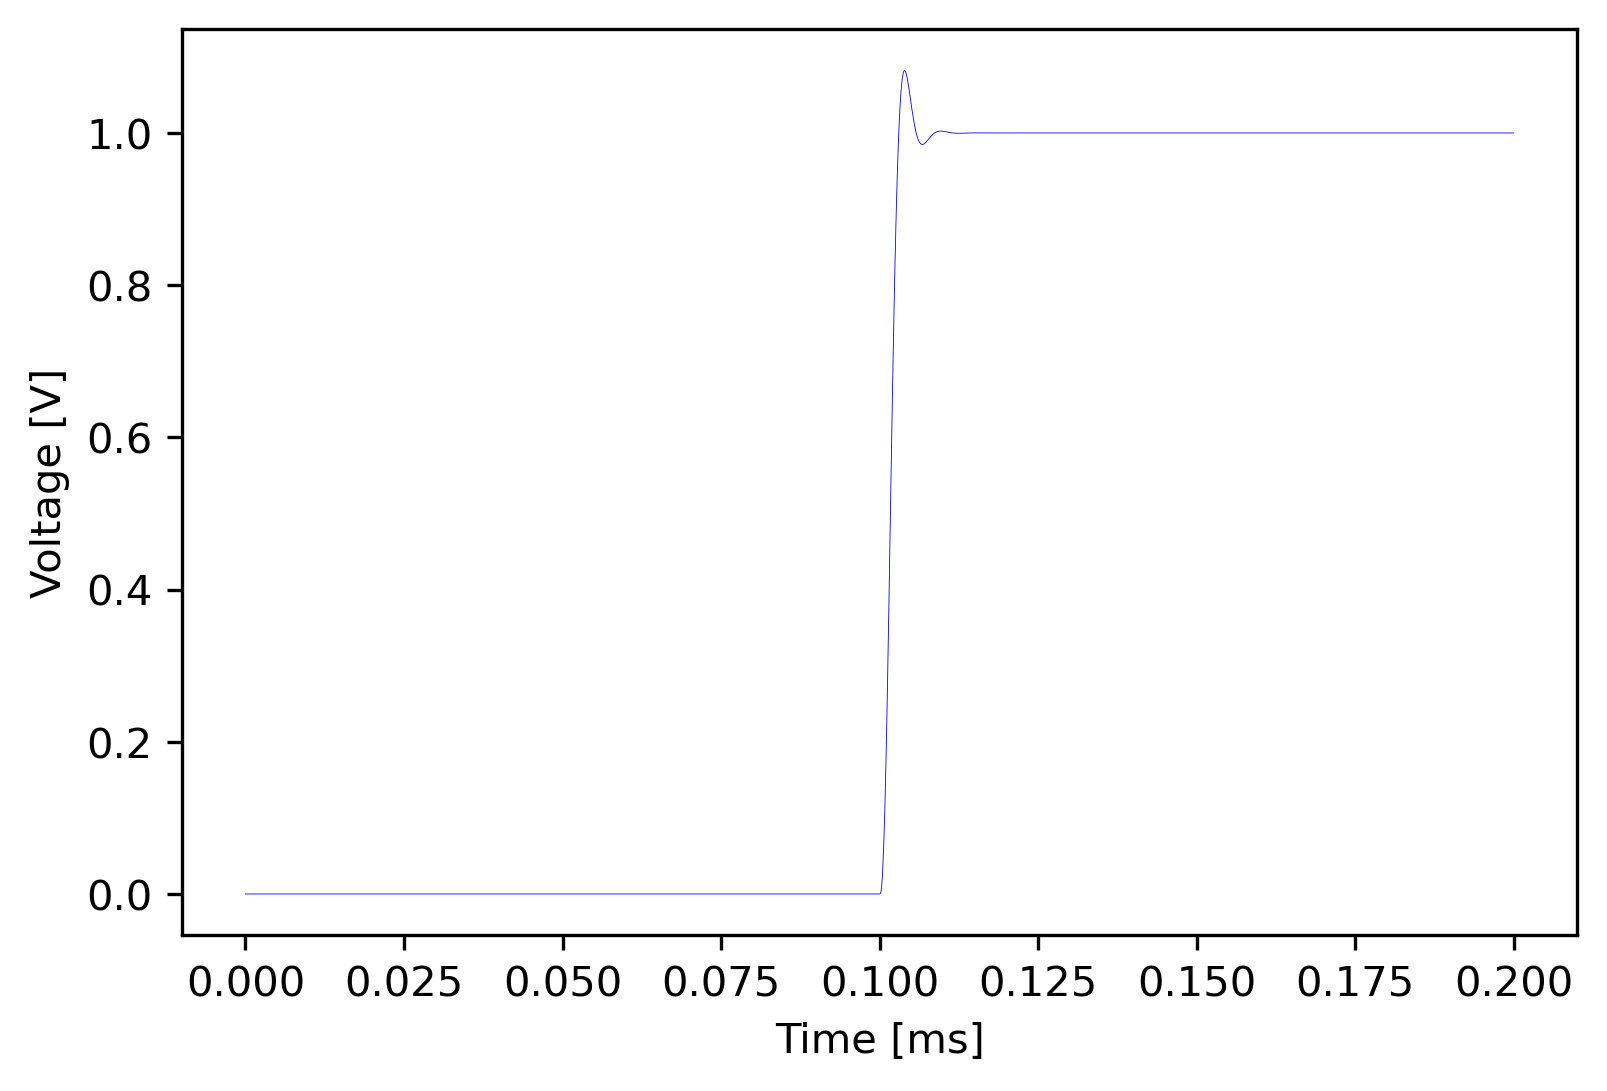

In [41]:
#ステップ応答のプロット

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [V]')
plt.plot(df11['Time'] / 0.001, df11['Voltage'], linewidth = 0.2, color = 'blue') #横軸をmsに変換
plt.savefig(filename11 + 'sim.png')
plt.show()

In [42]:
#ステップ応答データの読み込み。1列目：時間、2列目：電圧。
filename12 = 'StepChebyshev.txt'
df12 = pd.read_table(filename12, names=('Time', 'Voltage'), skiprows=1)

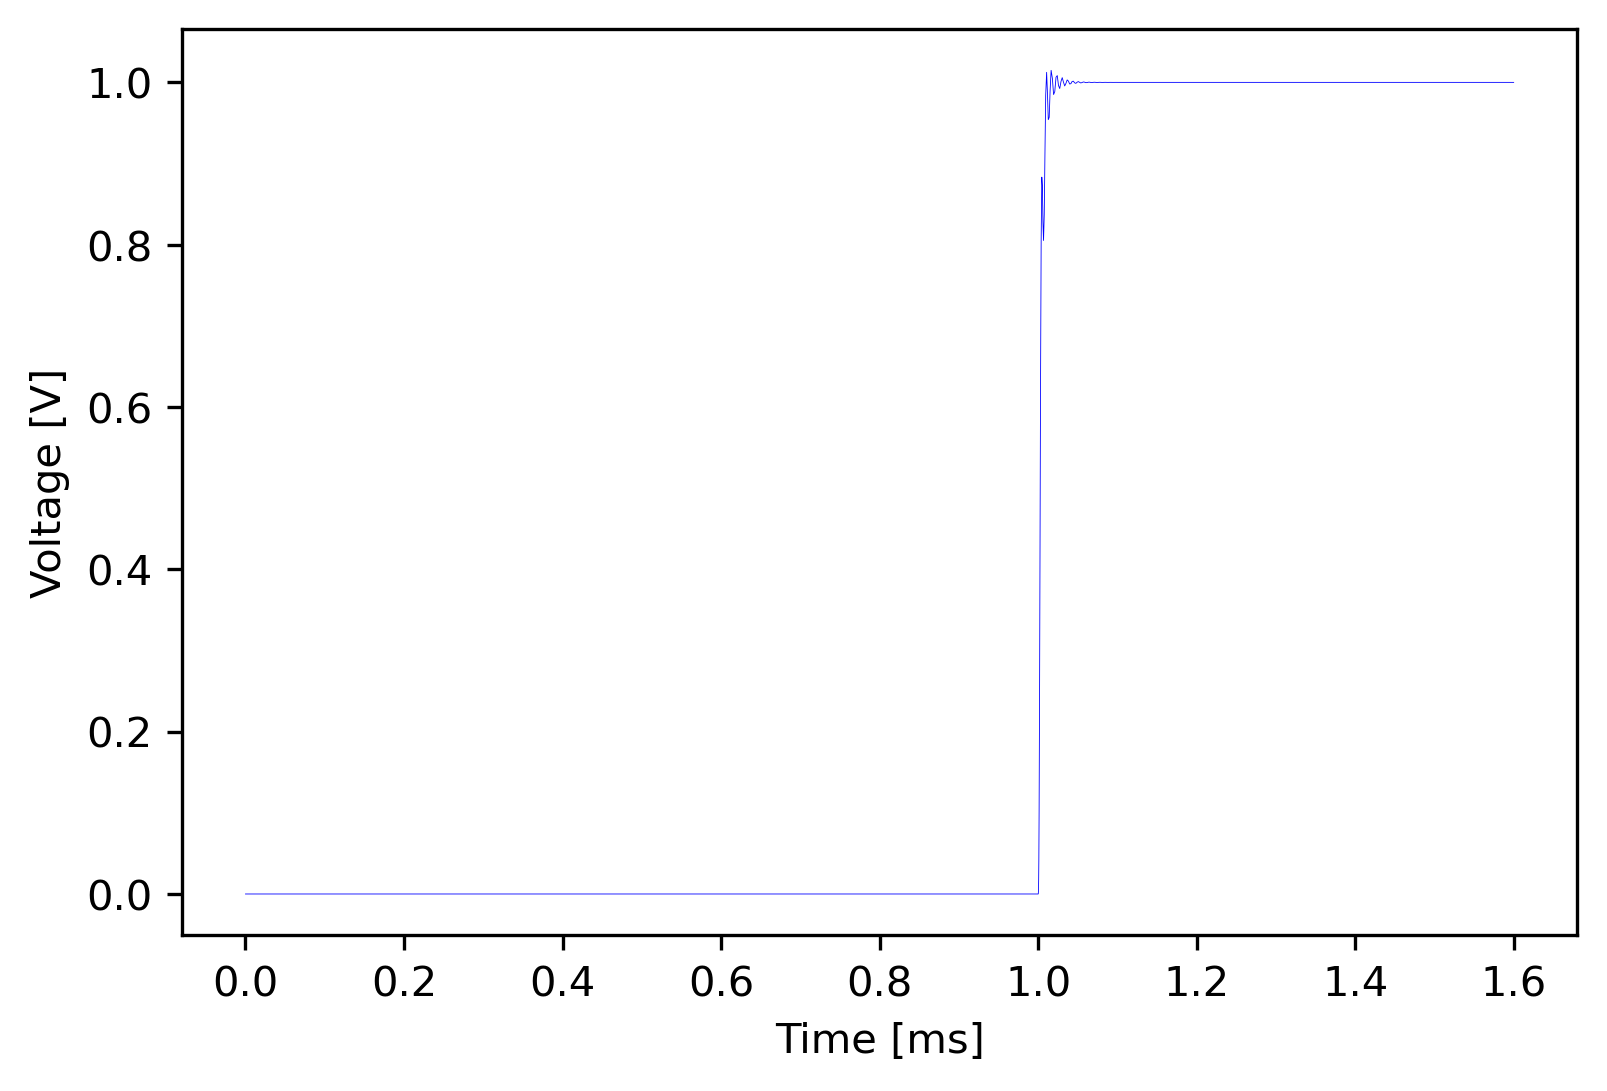

In [43]:
#ステップ応答のプロット

plt.figure(dpi = 300)
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [V]')
plt.plot(df12['Time'] / 0.001, df12['Voltage'], linewidth = 0.2, color  = 'blue') #横軸をmsに変換
plt.savefig(filename11 + 'sim.png')
plt.show()

In [44]:
filename2 = 'Butterworth.txt'
df2 = pd.read_table(filename2, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)
print(df2)

            Freq        Re        Im
0   1.000000e+02  0.999998 -0.001000
1   1.122018e+02  0.999997 -0.001122
2   1.258925e+02  0.999997 -0.001259
3   1.412538e+02  0.999997 -0.001412
4   1.584893e+02  0.999997 -0.001585
..           ...       ...       ...
90  3.162278e+06 -0.000032  0.000251
91  3.548134e+06 -0.000020  0.000178
92  3.981072e+06 -0.000013  0.000126
93  4.466836e+06 -0.000008  0.000089
94  5.000000e+06 -0.000005  0.000064

[95 rows x 3 columns]


In [45]:
df2['Complex'] = df2['Re'] + 1j * df2['Im']

In [46]:
df2['Amp'] = np.absolute(df2['Complex'])
df2['Amp_dB'] = 20 * np.log10(df2['Amp'])
df2['Phase'] = np.angle(df2['Complex']) * 180 / np.pi

In [47]:
df2['Phase']

0     -0.057287
1     -0.064277
2     -0.072120
3     -0.080920
4     -0.090793
        ...    
90    97.252043
91    96.462496
92    95.759074
93    95.132334
94    94.584748
Name: Phase, Length: 95, dtype: float64

In [48]:
l = []

for i in df2['Phase']:
    if i > 0:
        l.append(i-360)
    else:
        l.append(i)
df2['Phase'] = l

In [49]:
df2

,Freq,Re,Im,Complex,Amp,Amp_dB,Phase
0,1.000000e+02,0.999998,-0.001000,0.999998-0.001000j,0.999998,-0.000017,-0.057287
1,1.122018e+02,0.999997,-0.001122,0.999997-0.001122j,0.999998,-0.000017,-0.064277
2,1.258925e+02,0.999997,-0.001259,0.999997-0.001259j,0.999998,-0.000017,-0.072120
3,1.412538e+02,0.999997,-0.001412,0.999997-0.001412j,0.999998,-0.000017,-0.080920
4,1.584893e+02,0.999997,-0.001585,0.999997-0.001585j,0.999998,-0.000017,-0.090793
...,...,...,...,...,...,...,...
90,3.162278e+06,-0.000032,0.000251,-0.000032+0.000251j,0.000253,-71.936291,-262.747957
91,3.548134e+06,-0.000020,0.000178,-0.000020+0.000178j,0.000179,-74.936293,-263.537504
92,3.981072e+06,-0.000013,0.000126,-0.000013+0.000126j,0.000127,-77.936294,-264.240926
93,4.466836e+06,-0.000008,0.000089,-0.000008+0.000089j,0.000090,-80.936295,-264.867666


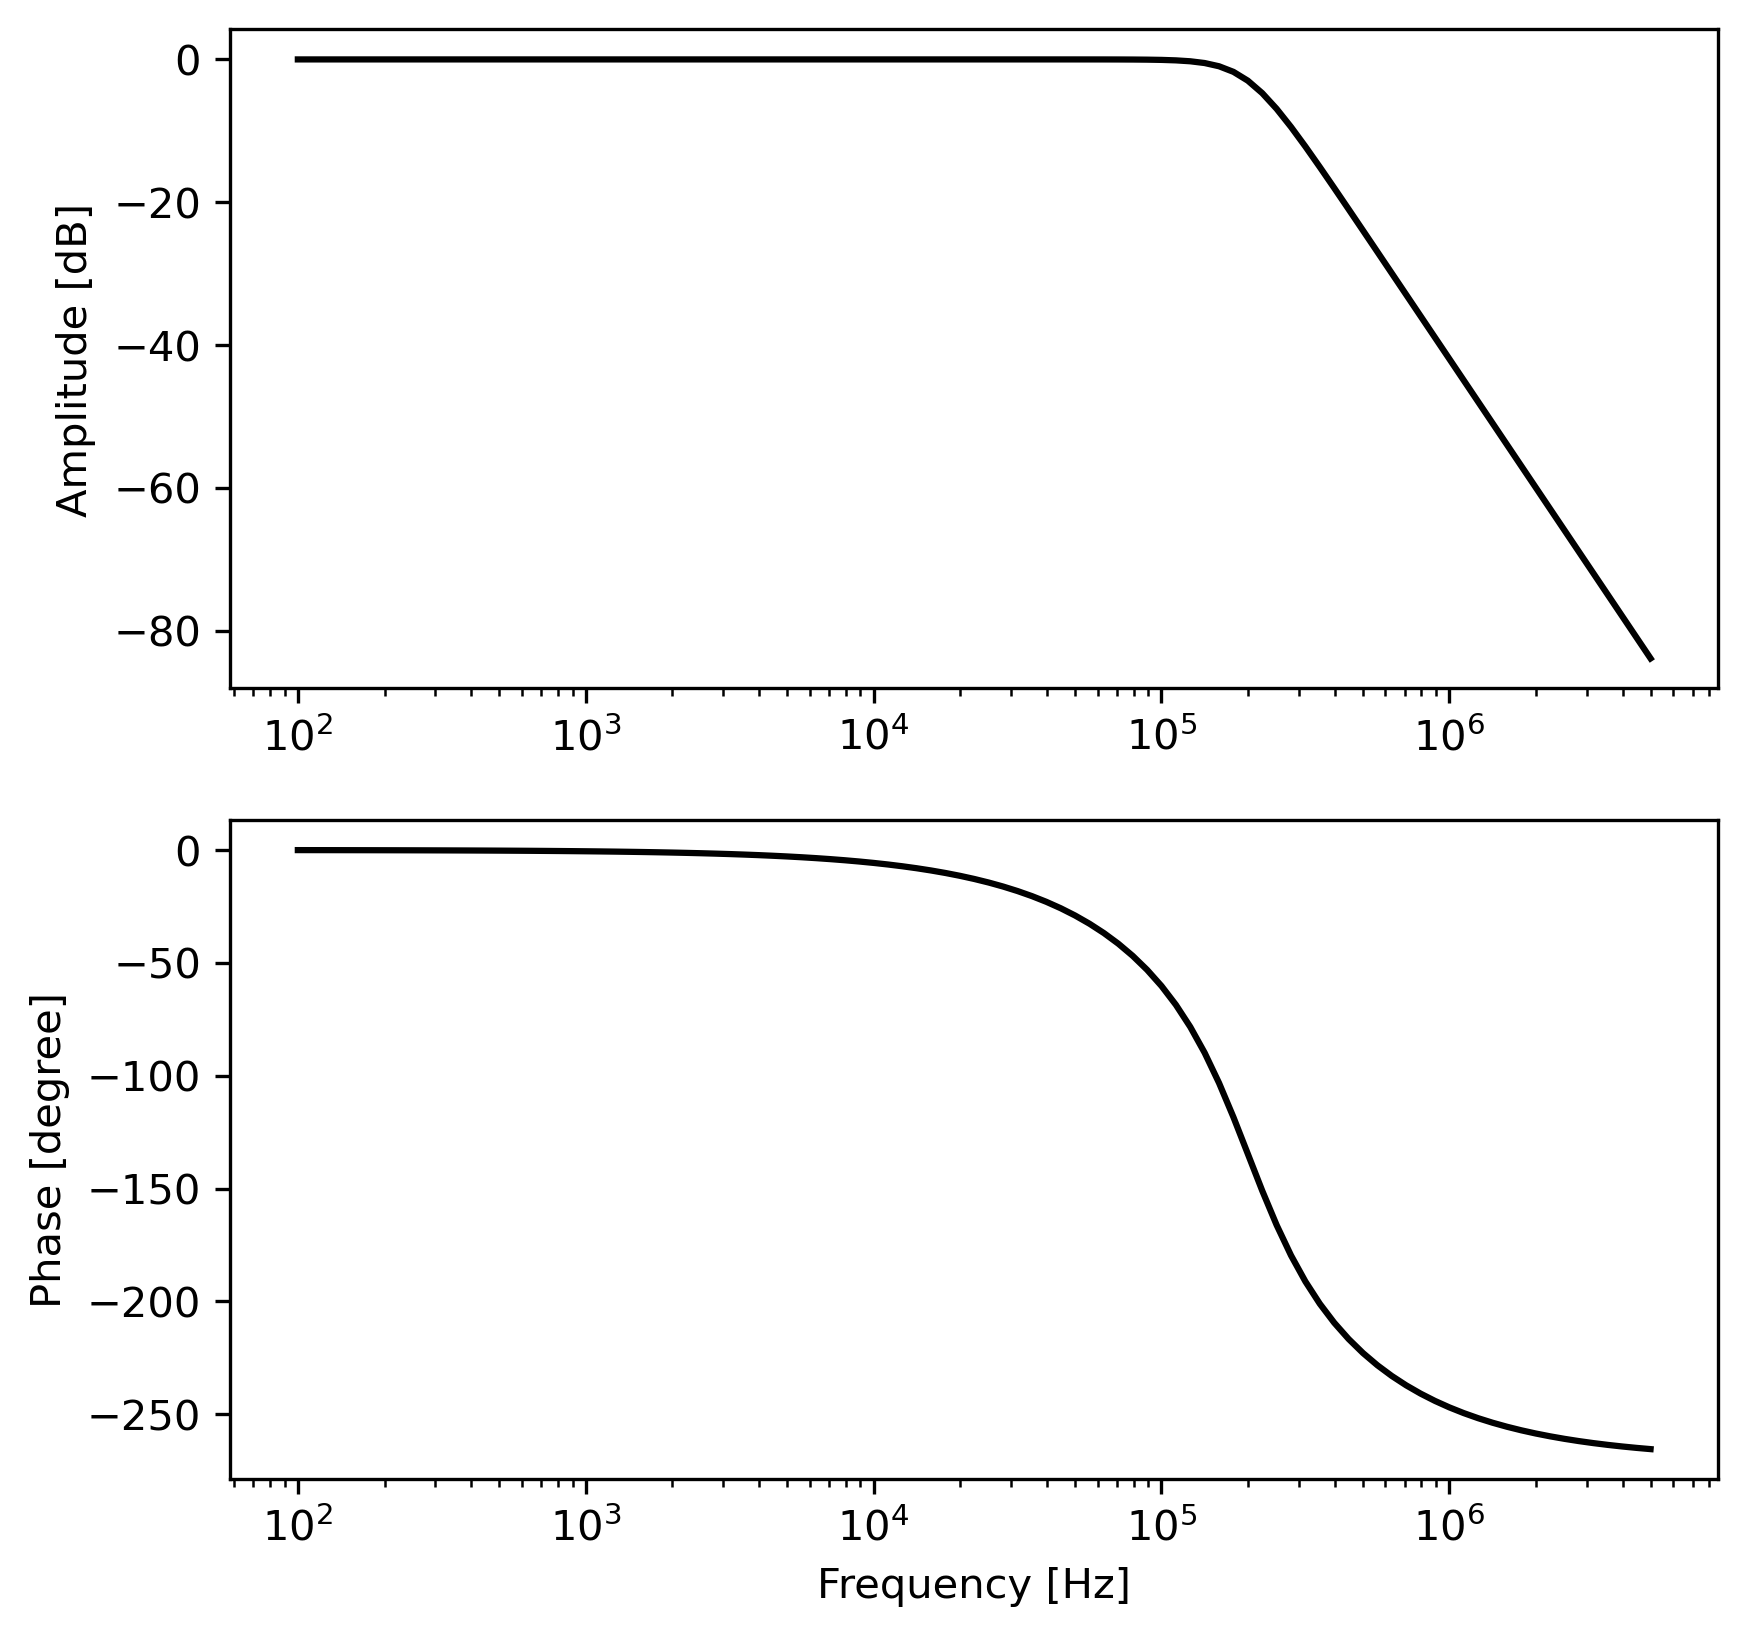

In [50]:
#周波数特性データのプロット

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df2['Freq'], df2['Amp_dB'], color='black')
ax1.set_ylabel("Amplitude [dB]")
ax1.set_xscale("log")

#位相のプロット
ax2.plot(df2['Freq'], df2['Phase'], color='black')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.set_xscale("log")

#グラフ画像保存
plt.savefig(filename2 + 'sim2.png')
plt.show()

In [51]:
filename3 = 'Chebyshev.txt'
df3 = pd.read_table(filename3, sep='\t+|,', engine='python', names=('Freq', 'Re', 'Im'), skiprows=1)


In [52]:
df3['Complex'] = df3['Re'] + 1j * df3['Im']

In [53]:
df3['Amp'] = np.absolute(df3['Complex'])
df3['Amp_dB'] = 20 * np.log10(df3['Amp'])
df3['Phase'] = np.angle(df3['Complex']) * 180 / np.pi

In [54]:
ll = []

for i in df3['Phase']:
    if i > 0:
        ll.append(i-360)
    else:
        ll.append(i)
df3['Phase'] = ll

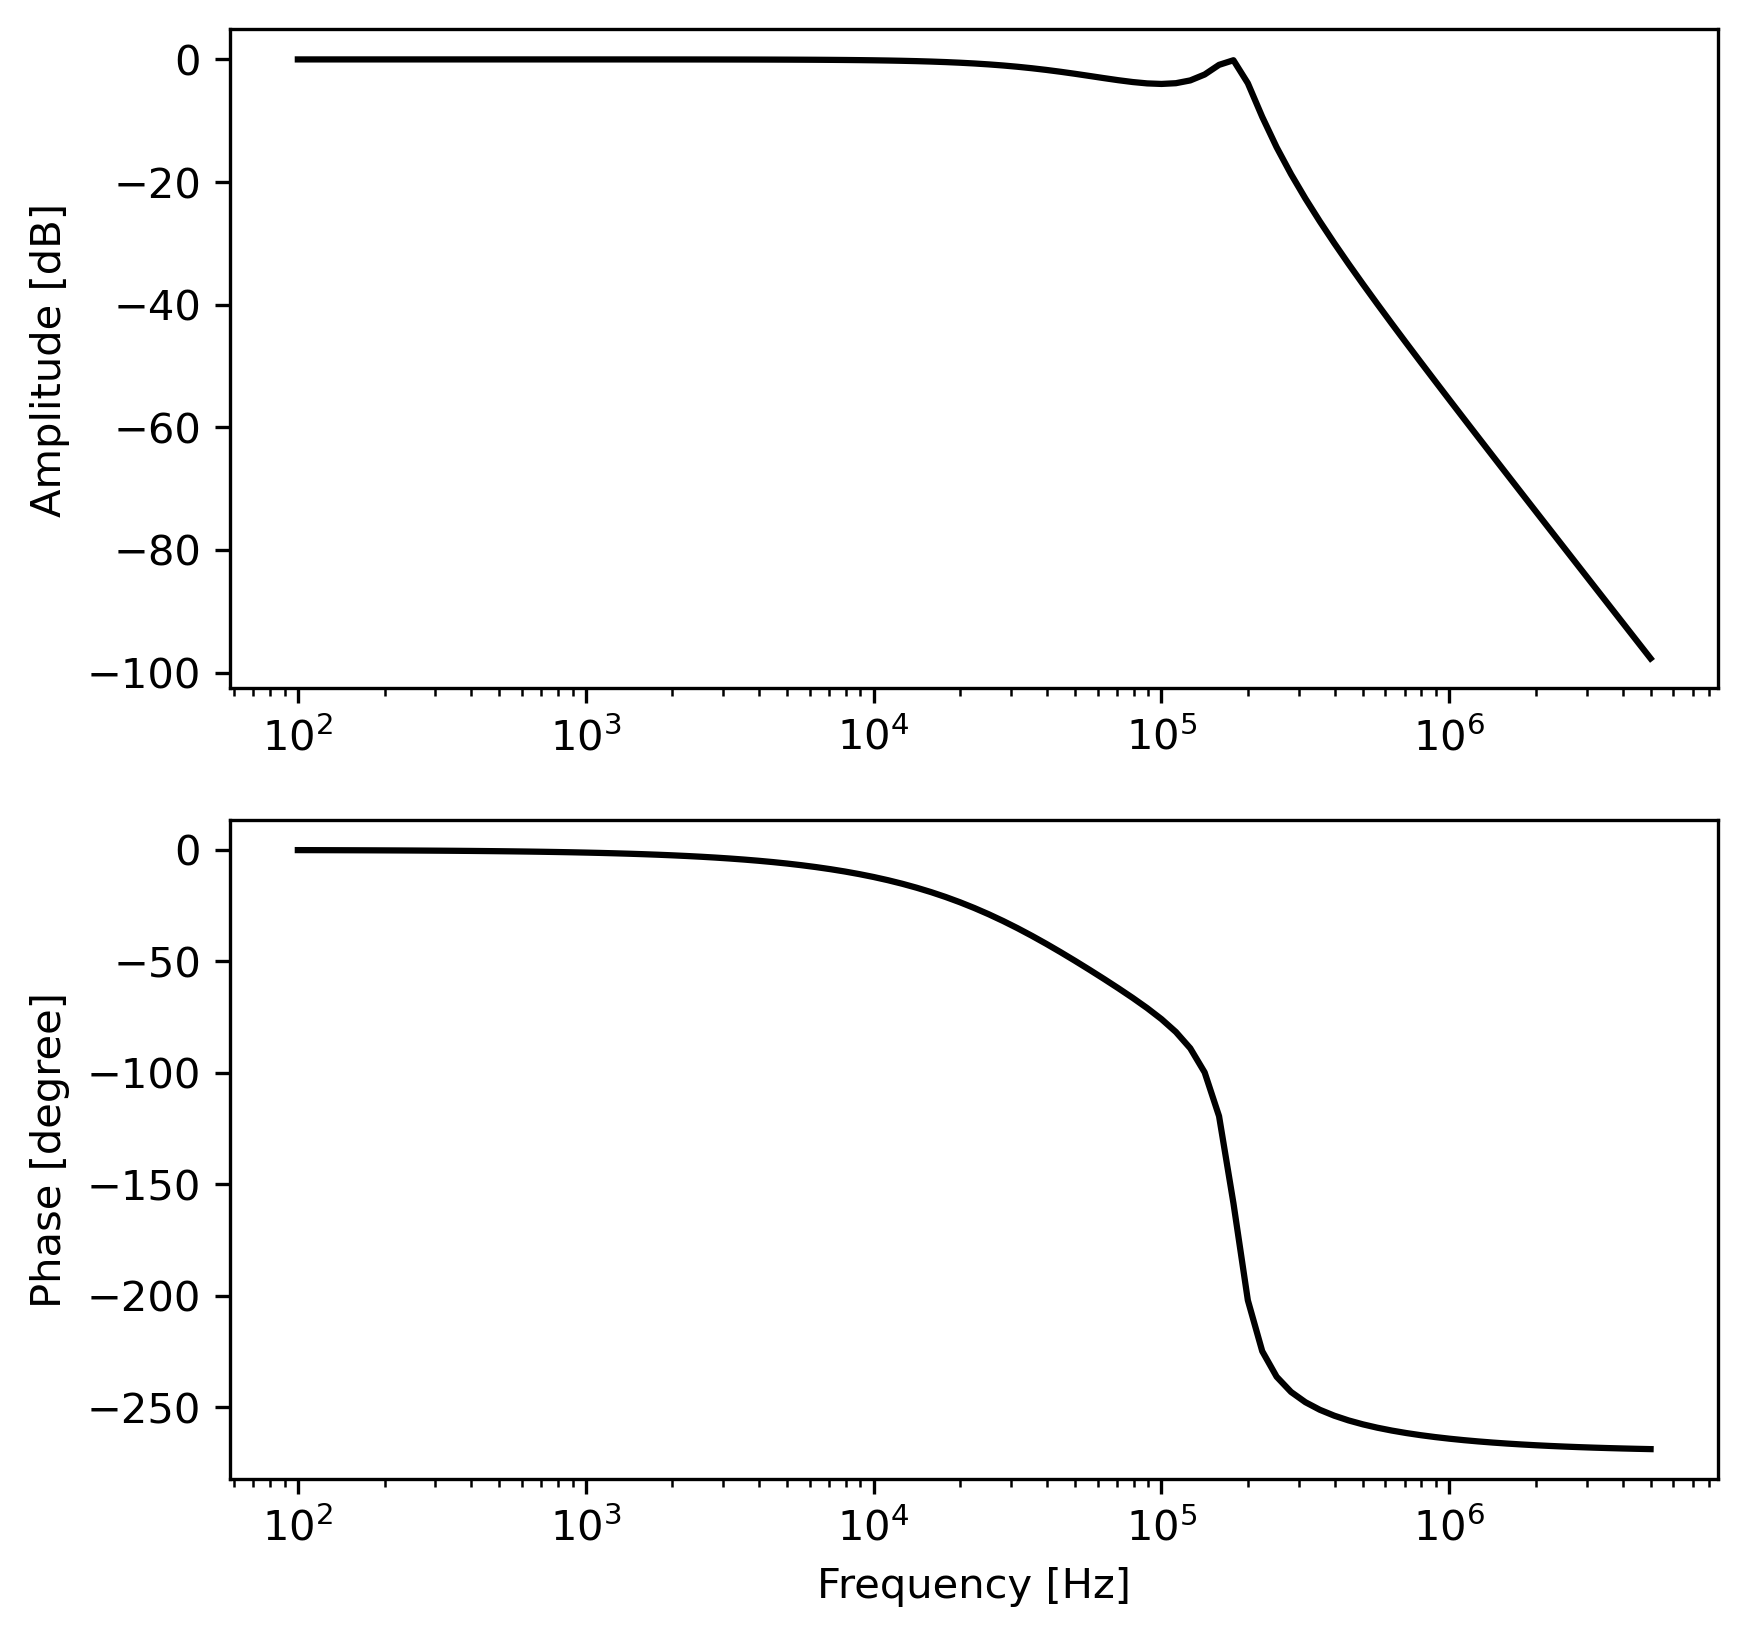

In [55]:
#周波数特性データのプロット

fig = plt.figure(figsize=(6.4,6.4), dpi=300)
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

#振幅のプロット
ax1.plot(df3['Freq'], df3['Amp_dB'], color='black')
ax1.set_ylabel("Amplitude [dB]")
ax1.set_xscale("log")

#位相のプロット
ax2.plot(df3['Freq'], df3['Phase'], color='black')
ax2.set_xlabel("Frequency [Hz]")
ax2.set_ylabel("Phase [degree]")
ax2.set_xscale("log")

#グラフ画像保存
plt.savefig(filename3 + 'sim3.png')
plt.show()